<a href="https://colab.research.google.com/github/juli66257/ProyectoIntegrador1Semestre/blob/main/Code/identifying_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sns.set_context('notebook')

pd.options.display.max_columns = None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/application_data.csv'
data = pd.read_csv(path)

data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## **Identificación de valores faltantes:**    
- Se crea un dataframe nuevo con el resumen de los resultados
- Se analiza la cantidad de valores faltantes según el Target

In [ ]:
variables = data.columns.to_list()

df_variables = pd.DataFrame(variables, columns = ['Variable'])
df_variables.head()

,Variable
0,SK_ID_CURR
1,TARGET
2,NAME_CONTRACT_TYPE
3,CODE_GENDER
4,FLAG_OWN_CAR


In [ ]:
total_rows = data.shape[0]
null_values_count = {}
unique_values_count = {}
unique_values = {}

for attribute in variables:
  null_values_count[attribute] = data[attribute].isna().sum() / total_rows
  unique_values_count[attribute] = len(data[attribute].unique()) / total_rows
  unique_values[attribute] = len(data[attribute].unique()) 

df_variables['% Valores nulos'] = df_variables['Variable'].map(null_values_count)
df_variables['% Valores únicos'] = df_variables['Variable'].map(unique_values_count)
df_variables['Cantidad valores únicos'] = df_variables['Variable'].map(unique_values)

df_variables.head()

,Variable,% Valores nulos,% Valores únicos,Cantidad valores únicos
0,SK_ID_CURR,0.0,1.000000,307511
1,TARGET,0.0,0.000007,2
2,NAME_CONTRACT_TYPE,0.0,0.000007,2
3,CODE_GENDER,0.0,0.000010,3
4,FLAG_OWN_CAR,0.0,0.000007,2


In [ ]:
unique_values_detail = {}

variables_for_unique_values = df_variables[df_variables['Cantidad valores únicos'] <= 10]['Variable'].to_list()

for attribute in variables_for_unique_values:
  unique_values_detail[attribute] = list(data[attribute].unique())

df_variables['Opciones'] = df_variables['Variable'].map(unique_values_detail)
df_variables['Opciones'].fillna('', inplace = True)

df_variables.head()

,Variable,% Valores nulos,% Valores únicos,Cantidad valores únicos,Opciones
0,SK_ID_CURR,0.0,1.000000,307511,
1,TARGET,0.0,0.000007,2,"[1, 0]"
2,NAME_CONTRACT_TYPE,0.0,0.000007,2,"[Cash loans, Revolving loans]"
3,CODE_GENDER,0.0,0.000010,3,"[M, F, XNA]"
4,FLAG_OWN_CAR,0.0,0.000007,2,"[N, Y]"


57 Variables con más del 10% de valores faltantes. 
50 Variables son descartadas por la cantidad de valores faltantes 


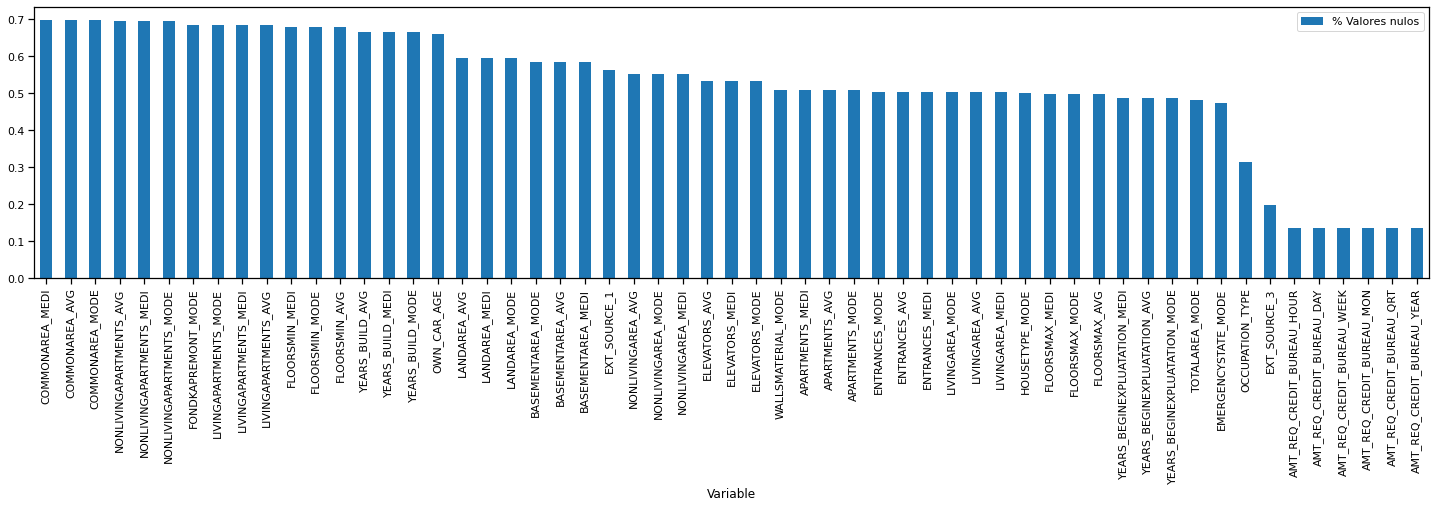

In [ ]:
df_variables[df_variables['% Valores nulos'] >= 0.1].sort_values(
    by = '% Valores nulos',
    ascending = False).plot(
        kind = 'bar',
        x = 'Variable',
        y = '% Valores nulos',
        figsize = (25, 5)
    )

print(f"{len(df_variables[df_variables['% Valores nulos'] >= 0.1])} Variables con más del 10% de valores faltantes. ")
print(f"{len(df_variables[df_variables['% Valores nulos'] >= 0.2])} Variables son descartadas por la cantidad de valores faltantes ")
plt.show()

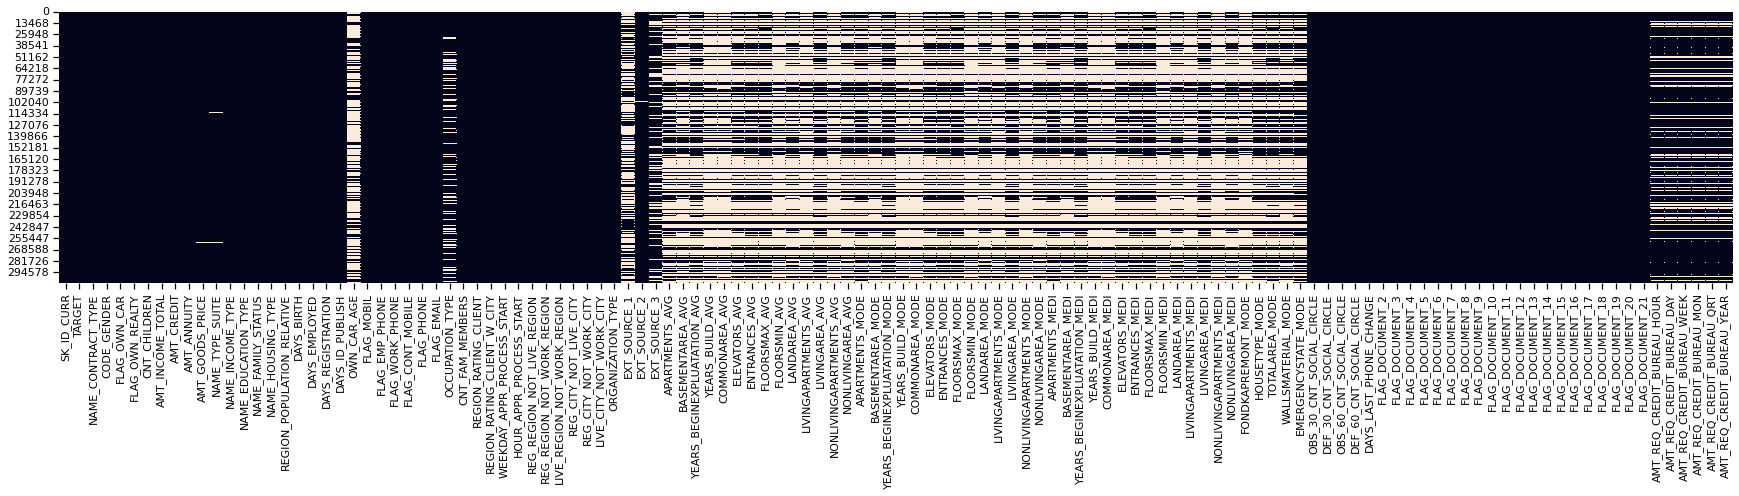

In [ ]:
plt.figure(figsize = (30, 5))
sns.heatmap(
    data[data['TARGET'] == 1].isnull(),
    cbar = False
)

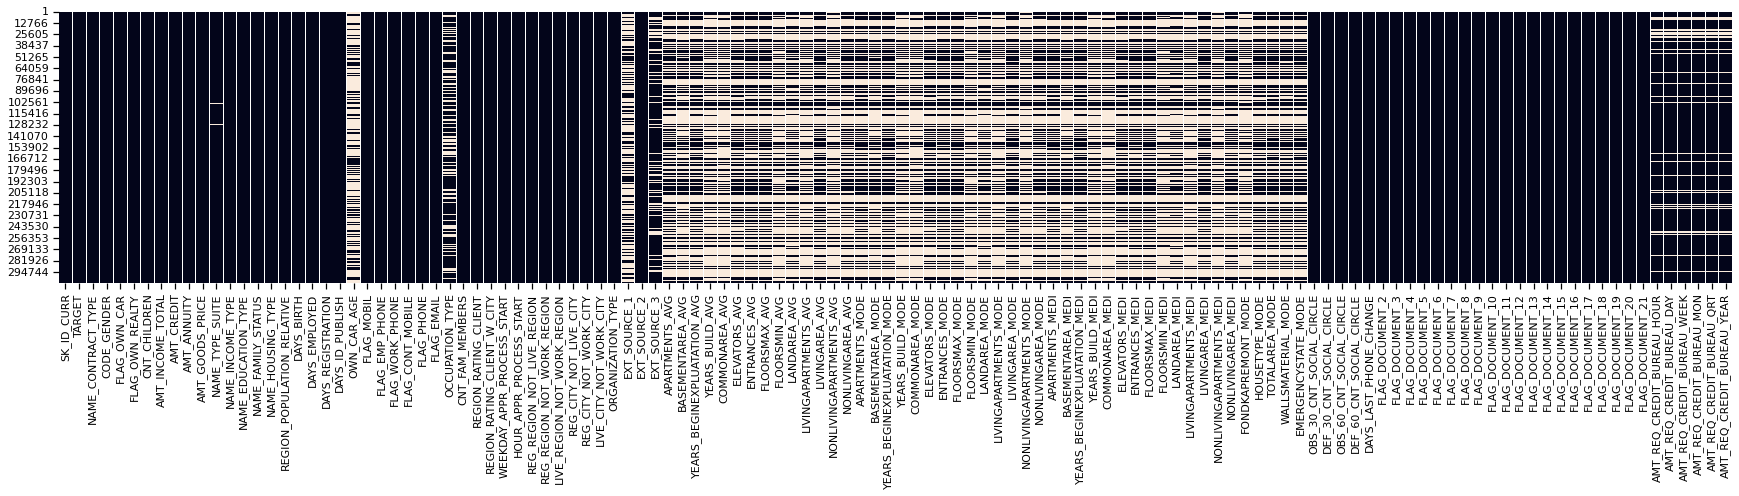

In [ ]:
plt.figure(figsize = (30, 5))
sns.heatmap(
    data[data['TARGET'] == 0].isnull(),
    cbar = False
)

### DataFrame analizando la cantidad de valores faltantes según el target:

In [ ]:
data_isna = pd.DataFrame(data[data['TARGET'] == 1].isna().sum(), columns = ['TARGET 1']).reset_index().merge(
    pd.DataFrame(data[data['TARGET'] == 0].isna().sum(), columns = ['TARGET 0']).reset_index(), how = 'left', on = 'index'
)

data_isna['TARGET 1_perc'] = data_isna['TARGET 1']/len(data[data['TARGET'] == 1])
data_isna['TARGET 0_perc'] = data_isna['TARGET 0']/len(data[data['TARGET'] == 0])

data_isna['TOTAL'] = data_isna['TARGET 1'] + data_isna['TARGET 0']

data_isna.head()

,index,TARGET 1,TARGET 0,TARGET 1_perc,TARGET 0_perc,TOTAL
0,SK_ID_CURR,0,0,0.0,0.0,0
1,TARGET,0,0,0.0,0.0,0
2,NAME_CONTRACT_TYPE,0,0,0.0,0.0,0
3,CODE_GENDER,0,0,0.0,0.0,0
4,FLAG_OWN_CAR,0,0,0.0,0.0,0


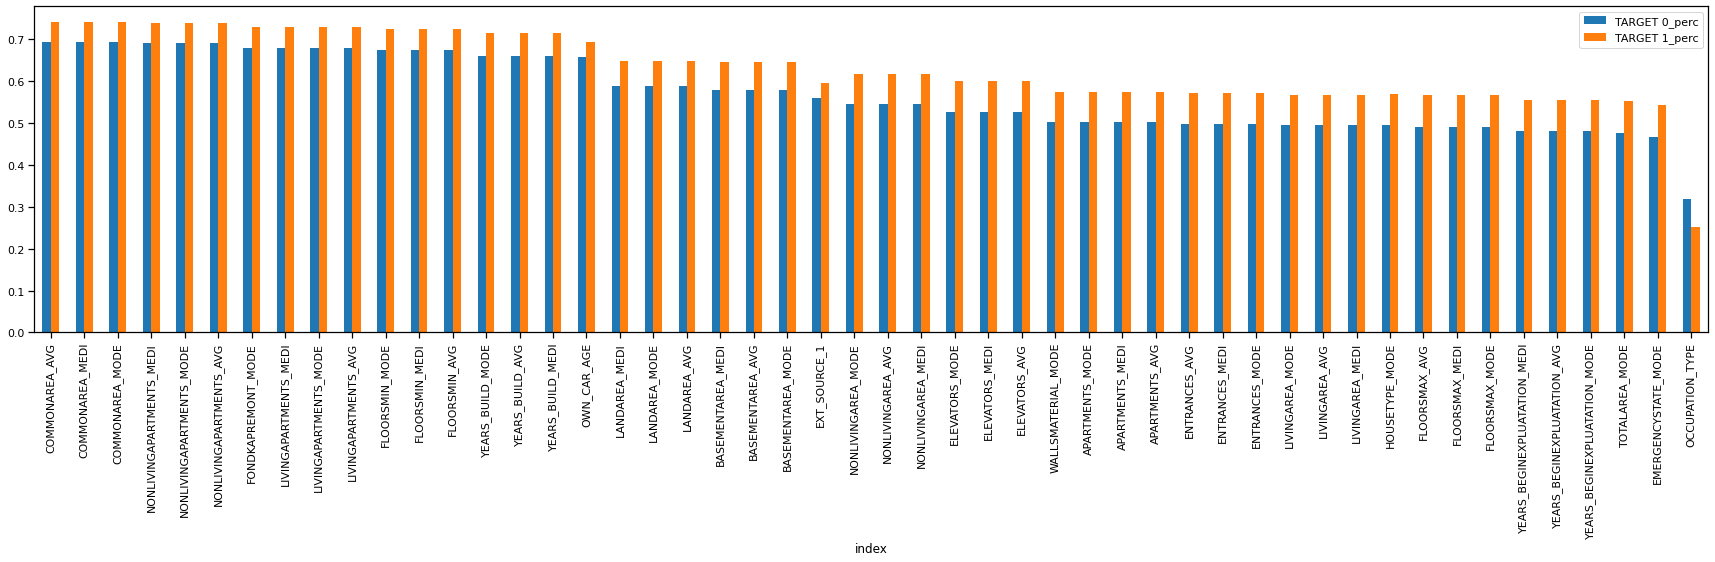

In [ ]:
exclude_variables_nan = df_variables[(df_variables['% Valores nulos'] >= 0.2)]['Variable'].to_list()

data_isna[data_isna['index'].isin(exclude_variables_nan)].sort_values(by = 'TOTAL', ascending = False).plot(
    kind = 'bar',
    x = 'index',
    y = ['TARGET 0_perc', 'TARGET 1_perc'],
    figsize = (30, 6)
)

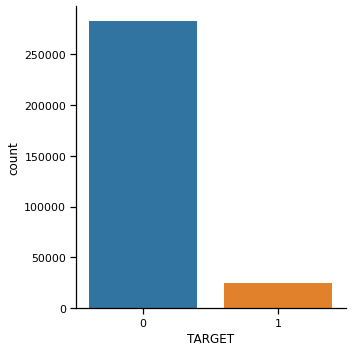

In [ ]:
sns.catplot(
    data = data,
    x = 'TARGET',
    kind = 'count'
)

## **Trusted data:**    

Se crea un nuevo dataframe conservando sólo los atributos que tienen menos del 20% de valores faltantes.

In [ ]:
data_trusted = data.drop(
    columns = exclude_variables_nan
)

print(f'Original data shape: {data.shape}')
print(f'Trusted data shape: {data_trusted.shape}\n\n')

data_trusted.head()

Original data shape: (307511, 122)
Trusted data shape: (307511, 72)




,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


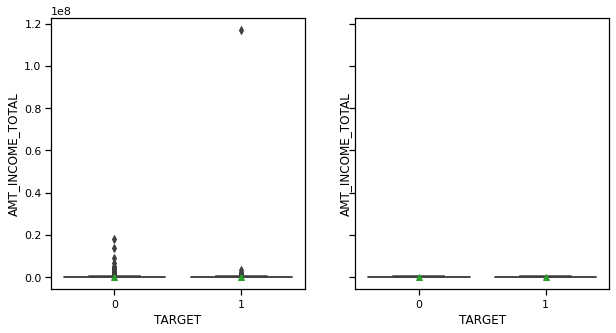

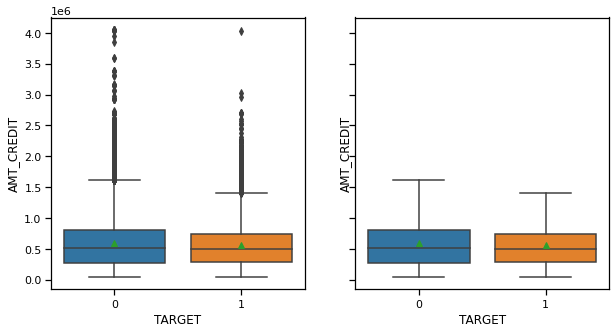

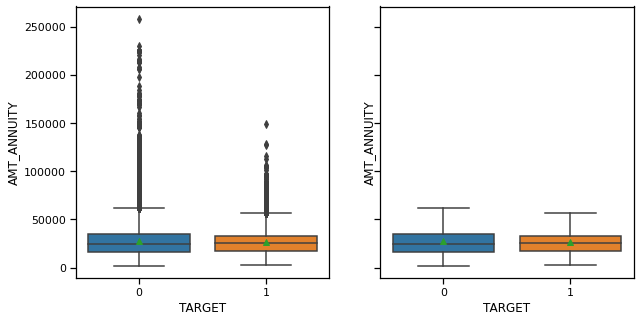

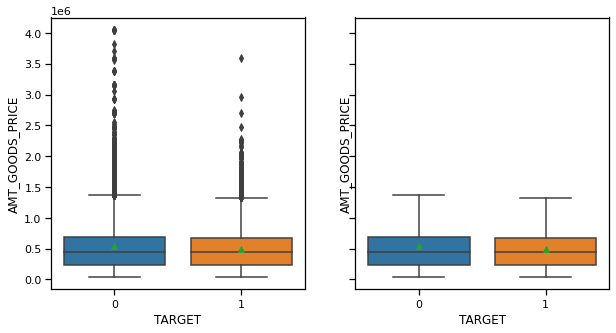

In [ ]:
numeric_attributes = [
                      'AMT_INCOME_TOTAL',
                      'AMT_CREDIT',
                      'AMT_ANNUITY',
                      'AMT_GOODS_PRICE',
]

for att in numeric_attributes:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

    sns.boxplot(
        data = data_trusted,
        x = 'TARGET',
        y = att,
        ax = axes[0],
        showmeans = True
    )

    sns.boxplot(
        data = data_trusted,
        x = 'TARGET',
        y = att,
        ax = axes[1],
        showfliers = False,
        showmeans = True
    )

    plt.show()

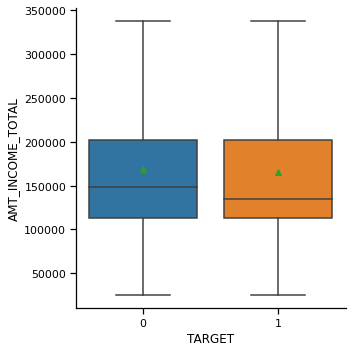

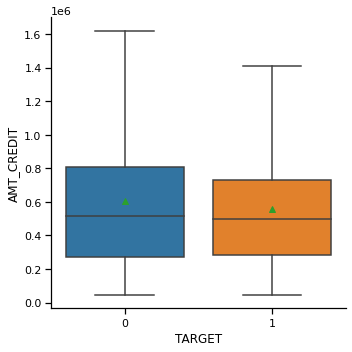

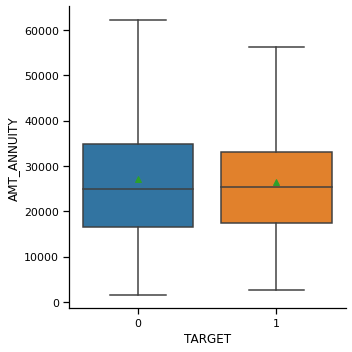

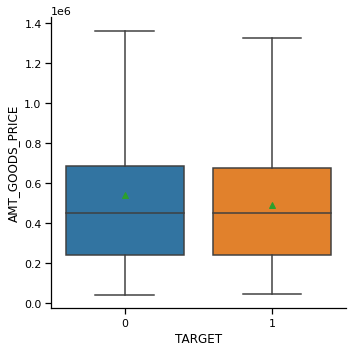

In [ ]:
for att in numeric_attributes:
    sns.catplot(
        data = data_trusted,
        x = 'TARGET',
        y = att,
        kind = 'box',
        showfliers = False,
        showmeans = True
    )

    plt.show()

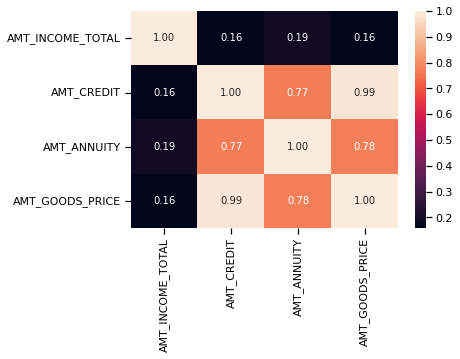

In [ ]:
sns.heatmap(
    data_trusted[numeric_attributes].corr(),
    annot=True, fmt=".2f"
)

plt.show()

In [ ]:
df_variables.to_excel('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/info_application_data.xlsx')

# **Previous Application:**

In [ ]:
path = '/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/previous_application.csv'
data = pd.read_csv(path)

variables = data.columns.to_list()

df_variables = pd.DataFrame(variables, columns = ['Variable'])

total_rows = data.shape[0]
null_values_count = {}
unique_values_count = {}
unique_values = {}

for attribute in variables:
  null_values_count[attribute] = data[attribute].isna().sum() / total_rows
  unique_values_count[attribute] = len(data[attribute].unique()) / total_rows
  unique_values[attribute] = len(data[attribute].unique()) 

df_variables['% Valores nulos'] = df_variables['Variable'].map(null_values_count)
df_variables['% Valores únicos'] = df_variables['Variable'].map(unique_values_count)
df_variables['Cantidad valores únicos'] = df_variables['Variable'].map(unique_values)

unique_values_detail = {}

variables_for_unique_values = df_variables[df_variables['Cantidad valores únicos'] <= 10]['Variable'].to_list()

for attribute in variables_for_unique_values:
  unique_values_detail[attribute] = list(data[attribute].unique())

df_variables['Opciones'] = df_variables['Variable'].map(unique_values_detail)
df_variables['Opciones'].fillna('', inplace = True)

df_variables.to_excel('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/info_previous_application_data.xlsx')

14 Variables con más del 10% de valores faltantes. 
4 Variables son descartadas por la cantidad de valores faltantes 


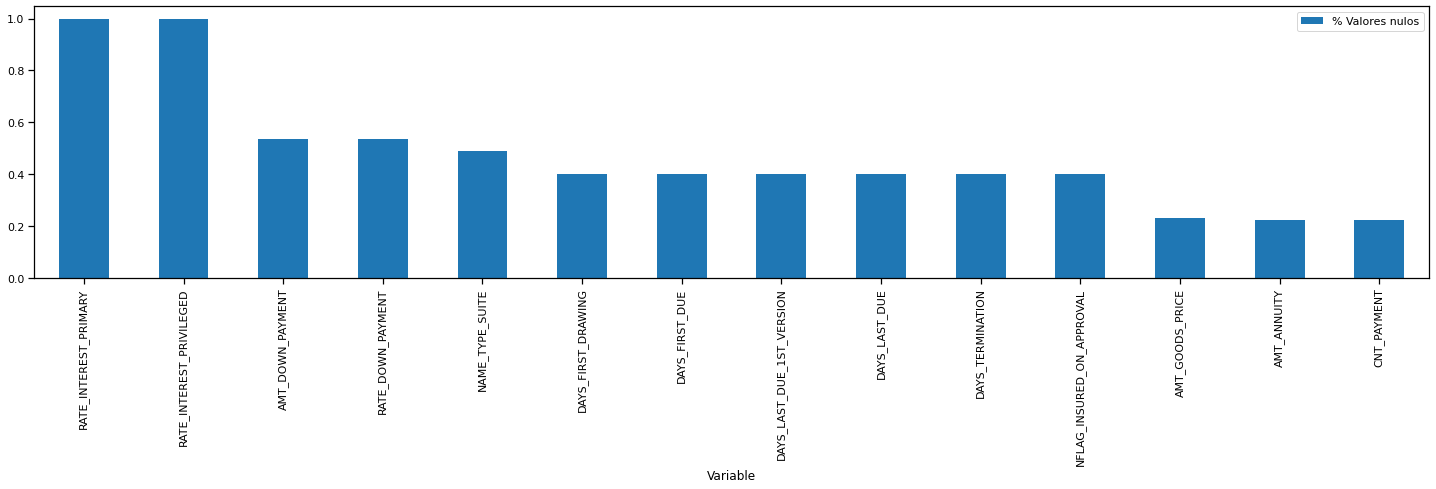

In [ ]:
df_variables[df_variables['% Valores nulos'] >= 0.1].sort_values(
    by = '% Valores nulos',
    ascending = False).plot(
        kind = 'bar',
        x = 'Variable',
        y = '% Valores nulos',
        figsize = (25, 5)
    )

print(f"{len(df_variables[df_variables['% Valores nulos'] >= 0.1])} Variables con más del 10% de valores faltantes. ")
print(f"{len(df_variables[df_variables['% Valores nulos'] >= 0.5])} Variables son descartadas por la cantidad de valores faltantes ")
plt.show()

# **Observaciones Retroalimentación:**    
- Detallar y expandir más la metodología. Desde la propuesta se debería haber aplicado
- Sugerencia: Para algunas partes del proyecto, usar Apache Spark. Mencionar la tecnología directamente, en el caso de colab (boto3).
- No meternos por catalogación (Glue, Athena...)
- Máx de faltantes un 20%
- Mirar la correlación con respecto a las variable de respuesta, coeficiente de Mathews, ANOVA's
- Impacto de la variable de respuesta sobre las variables cuantitivas
- Analizar variables que hacen parte del modelo socioeconómico
- Detección de atípicos, que generan perturbaciones en la modelación multivariante
- Modelo de clasificación: Se calibrar con el punto de corte de la función sigmoide de la regresión logística (ejemplo medicina). Para la muestra desbalanceada, se toman datos que equilibran la muestra (mín TARGET) muestreo aleatorio sin reempazo